<a href="https://colab.research.google.com/github/Mohammadindrakholid/Pembelajaran_Mesin/blob/main/Artikel_KNN_%26_Desicion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best K (n_neighbors): 23
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



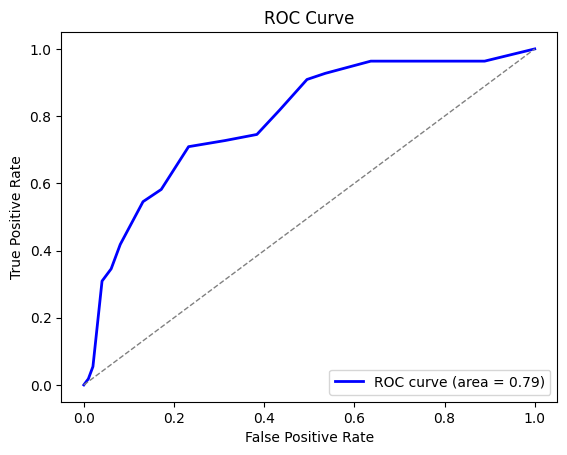

Prediksi: Pasien memiliki diabetes (1).


In [11]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Load package drive
from google.colab import drive

#Memberikan akses kepada colab/autorization
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuliah/Pembelajaran Mesin/data_set/diabetes.csv')

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Menangani nilai yang hilang dengan mengganti nilai null menggunakan median
X.fillna(X.median(), inplace=True)

# Normalisasi data untuk menyelaraskan skala fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model K-Nearest Neighbors
knn = KNeighborsClassifier()

# Optimasi hyperparameter (jumlah tetangga terbaik) menggunakan GridSearchCV
param_grid = {'n_neighbors': range(1, 25)}  # Cari nilai k dari 1 hingga 25
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik berdasarkan GridSearchCV
best_knn = grid_search.best_estimator_

# Prediksi pada data uji
y_pred = best_knn.predict(X_test)

# Evaluasi performa model
print("Best K (n_neighbors):", grid_search.best_params_['n_neighbors'])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Menghitung dan menampilkan kurva ROC
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Prediksi pada data baru
data_baru = pd.DataFrame([[6, 500, 72, 35, 0, 33.6, 0.627, 50]],
                         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
data_baru = scaler.transform(data_baru)  # Normalisasi data baru
prediction = best_knn.predict(data_baru)

# Menampilkan hasil prediksi
if prediction[0] == 1:
    print("Prediksi: Pasien memiliki diabetes (1).")
else:
    print("Prediksi: Pasien tidak memiliki diabetes (0).")


In [10]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuliah/Pembelajaran Mesin/data_set/diabetes.csv')

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Outcome'])  # Menghapus kolom 'Outcome' untuk dijadikan fitur
y = data['Outcome']  # Mengambil kolom 'Outcome' sebagai target

# Mengganti nilai null (missing values) dengan median
X.fillna(X.median(), inplace=True)

# Normalisasi data fitur
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisi parameter yang akan dioptimalkan
param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}

# Mencari parameter terbaik dengan GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Model dengan parameter terbaik
decision_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Melakukan prediksi pada data uji
y_pred = decision_tree.predict(X_test)

# Data baru untuk diprediksi
data_baru = pd.DataFrame([[6, 500, 72, 35, 0, 33.6, 0.627, 50]],
                         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
data_baru = pd.DataFrame(scaler.transform(data_baru), columns=data_baru.columns)

# Melakukan prediksi pada data baru
prediction = decision_tree.predict(data_baru)

# Menampilkan hasil prediksi pada data baru
if prediction[0] == 1:
    print("Prediksi: Pasien memiliki diabetes (1).")
else:
    print("Prediksi: Pasien tidak memiliki diabetes (0).")

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Prediksi: Pasien memiliki diabetes (1).
Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

